<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; "> LES PLUS BEAUX LOGIS DE PARIS - ANALYSE IMMOBILIERE</h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 -  Analyse des données</h2>
</div>

In [3]:
# Les bases 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# Suppression du warning sur format fichier (openpyxl)
import warnings
warnings.simplefilter("ignore")

# Importation du fichier 'historique_immobilier_paris_2017_2021.xlsx'
immos = pd.read_excel("historique_immobilier_paris_2017_2021.xlsx")

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Inspection des données</h3>
</div> 

In [6]:
immos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   adresse_numero    26196 non-null  int64         
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  int64         
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  int64         
 7   type_local        26196 non-null  object        
 8   surface_reelle    26196 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.8+ MB


In [7]:
immos.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15


In [8]:
# Doublons sur les cessions ?
immos.duplicated().sum() 

16

In [9]:
# Suppression des doublons
immos.drop_duplicates(inplace=True)

In [10]:
immos.duplicated().sum() 

0

In [11]:
immos.describe()

,date_mutation,valeur_fonciere,adresse_numero,code_postal,code_type_local,surface_reelle
count,26180,2.618000e+04,26180.000000,26180.000000,26180.000000,26180.000000
mean,2019-06-09 16:03:30.114591232,4.916967e+05,47.447899,75012.716463,2.140718,46.867265
min,2017-01-02 00:00:00,8.519470e+04,1.000000,75001.000000,2.000000,11.000000
25%,2018-03-14 18:00:00,2.340259e+05,10.000000,75009.000000,2.000000,23.000000
50%,2019-05-23 00:00:00,3.547085e+05,27.000000,75014.000000,2.000000,35.000000
75%,2020-09-16 00:00:00,5.702197e+05,63.000000,75017.000000,2.000000,55.000000
max,2021-12-31 00:00:00,3.843359e+07,407.000000,75020.000000,4.000000,3945.000000
std,NaN,5.714485e+05,55.700865,5.268984,0.511512,52.418216


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Types de locaux et nombres de transactions</h3>
</div> 

In [13]:
immos.code_type_local.value_counts()

code_type_local
2    24338
4     1842
Name: count, dtype: int64

In [14]:
immos.type_local.value_counts()

type_local
Appartement                                 24338
Local industriel. commercial ou assimilé     1842
Name: count, dtype: int64

Deux types de locaux référencés, les appartements sont les plus nombreux.

In [16]:
# Nombre de transactions dans le DataFrame
immos.shape[0]

26180

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.3 - Intervalle de l'historique des données</h3>
</div>  

In [18]:
# Vérification de la plage de l'historique disponible
immos.date_mutation.describe()

count                            26180
mean     2019-06-09 16:03:30.114591232
min                2017-01-02 00:00:00
25%                2018-03-14 18:00:00
50%                2019-05-23 00:00:00
75%                2020-09-16 00:00:00
max                2021-12-31 00:00:00
Name: date_mutation, dtype: object

Lecture directe : du 02/01/2017 au 31/12/2021

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.4 - Evolution du prix au mètre carré des appartements dans Paris</h3>
</div>   

In [21]:
# Création d'une colonne donnant le prix au m²
immos['prix_m2'] = round(immos.valeur_fonciere/immos.surface_reelle,2)

In [22]:
immos.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.19
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.73
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.02
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.58
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.11


In [23]:
# Simplification du DataFrame par élimination des colonnes inutlles
immos.drop(columns={'adresse_numero', 'adresse_nom_voie', 'nom_commune', 'code_type_local'}, inplace=True)
immos.head()

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle,prix_m2
0,2017-01-03,5.505597e+05,75003,Appartement,50,11011.19
1,2017-01-12,1.576492e+06,75008,Appartement,163,9671.73
2,2017-01-10,6.577574e+05,75008,Appartement,66,9966.02
3,2017-01-10,2.500868e+05,75003,Appartement,22,11367.58
4,2017-01-13,1.762667e+05,75001,Appartement,15,11751.11


In [24]:
# Création d'un DataFrame regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
# Création d'une colonne 'annee'
immos['annee'] = immos['date_mutation'].dt.year
immos_appartements_m2 = immos[immos['type_local']=='Appartement'].groupby('annee').agg(
    prix_moyen_vente=('valeur_fonciere', 'mean'),
    surface_moyenne=('surface_reelle', 'mean'),
    prix_m2=('prix_m2', 'mean')
).round(2).reset_index()

immos_appartements_m2

,annee,prix_moyen_vente,surface_moyenne,prix_m2
0,2017,427965.07,44.63,9492.44
1,2018,448055.76,44.27,10031.40
2,2019,462079.47,43.37,10562.46
3,2020,462514.31,42.91,10675.34
4,2021,458771.51,43.48,10455.60


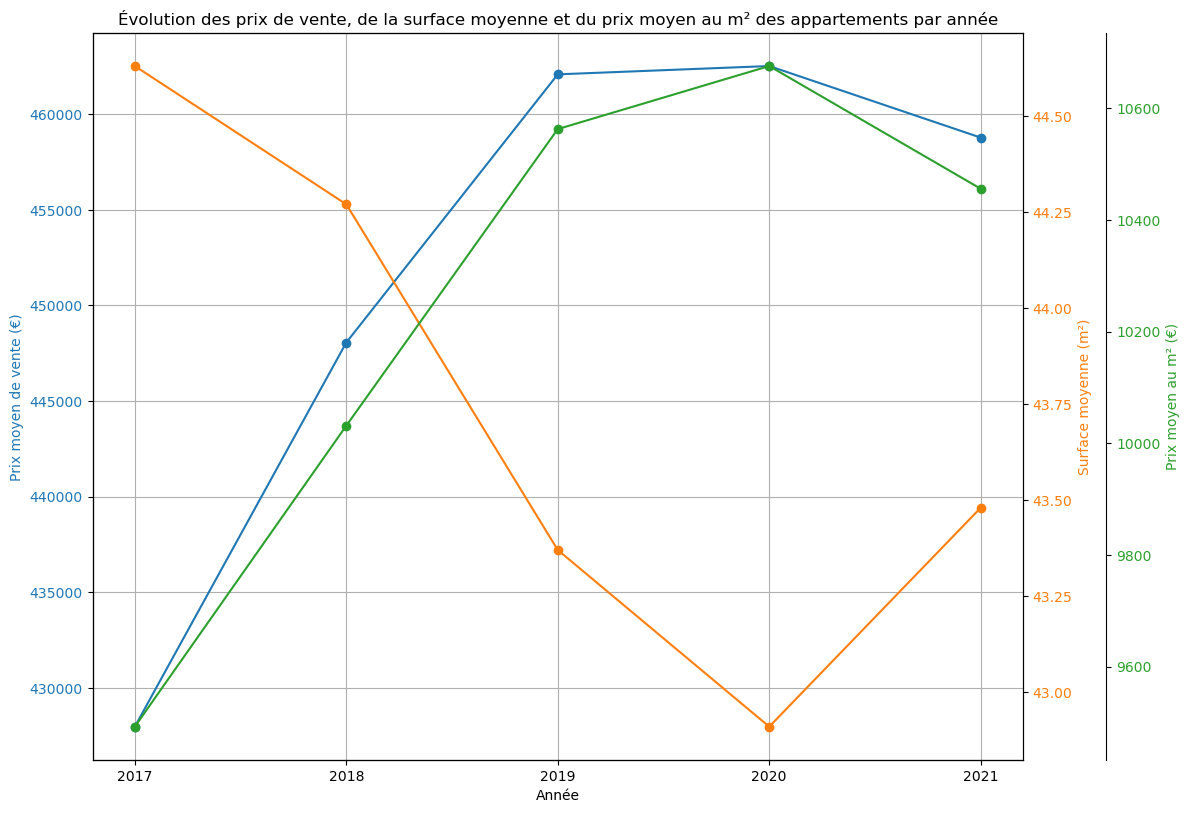

In [25]:
# Visualisation des différentes évolutions 
# Création d'une figure et un axe principal
fig, ax1 = plt.subplots(figsize=(12, 8))

# Tracé du prix moyen de vente sur l'axe principal
ax1.set_xlabel('Année')
ax1.set_ylabel('Prix moyen de vente (€)', color='tab:blue')#
ax1.plot(immos_appartements_m2['annee'], immos_appartements_m2['prix_moyen_vente'], marker='o', color='tab:blue', label='Prix moyen de vente')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Création d'un second axe qui partage le même axe x
ax2 = ax1.twinx()  
ax2.set_ylabel('Surface moyenne (m²)', color='tab:orange')
ax2.plot(immos_appartements_m2['annee'], immos_appartements_m2['surface_moyenne'], marker='o', color='tab:orange', label='Surface moyenne')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Création d'un troisième axe qui partage le même axe x
ax3 = ax1.twinx()  
ax3.spines['right'].set_position(('outward', 60))  # Décaler le troisième axe pour éviter qu'il chevauche le second
ax3.set_ylabel('Prix moyen au m² (€)', color='tab:green')
ax3.plot(immos_appartements_m2['annee'], immos_appartements_m2['prix_m2'], marker='o', color='tab:green', label='Prix moyen au m²')
ax3.tick_params(axis='y', labelcolor='tab:green')

# Ajout des légendes
fig.tight_layout()  # Ajuster l'espacement pour éviter le chevauchement des étiquettes
plt.title('Évolution des prix de vente, de la surface moyenne et du prix moyen au m² des appartements par année')
ax1.grid(True)

plt.xticks(immos_appartements_m2.annee)

# Affichage du graphique
plt.show()

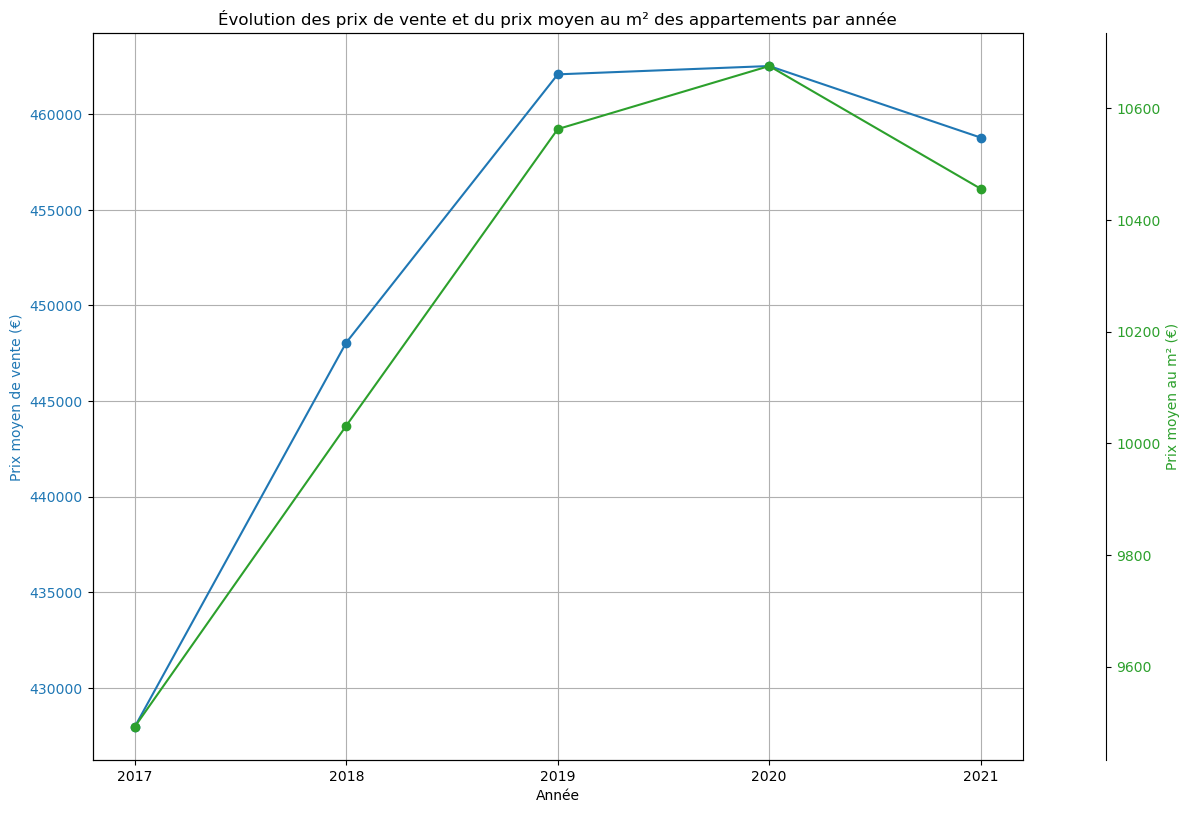

In [26]:
# Visualisation des différentes évolutions / version simplifiée / Prix de vente et prix au m²
# Création d'une figure et un axe principal
fig, ax1 = plt.subplots(figsize=(12, 8))

# Tracé du prix moyen de vente sur l'axe principal
ax1.set_xlabel('Année')
ax1.set_ylabel('Prix moyen de vente (€)', color='tab:blue')#
ax1.plot(immos_appartements_m2['annee'], immos_appartements_m2['prix_moyen_vente'], marker='o', color='tab:blue', label='Prix moyen de vente')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Création d'un deuxième axe qui partage le même axe x
ax2 = ax1.twinx()  
ax2.spines['right'].set_position(('outward', 60))  # Décaler le troisième axe pour éviter qu'il chevauche le second
ax2.set_ylabel('Prix moyen au m² (€)', color='tab:green')
ax2.plot(immos_appartements_m2['annee'], immos_appartements_m2['prix_m2'], marker='o', color='tab:green', label='Prix moyen au m²')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Ajout des légendes
fig.tight_layout()  # Ajuster l'espacement pour éviter le chevauchement des étiquettes
plt.title('Évolution des prix de vente et du prix moyen au m² des appartements par année')
ax1.grid(True)

plt.xticks(immos_appartements_m2.annee)

# Affichage du graphique
plt.show()

Les moyennes des prix de vente et des prix au m² des appartements à Paris augmentent de 2017 à 2020, puis fléchissent en 2021.

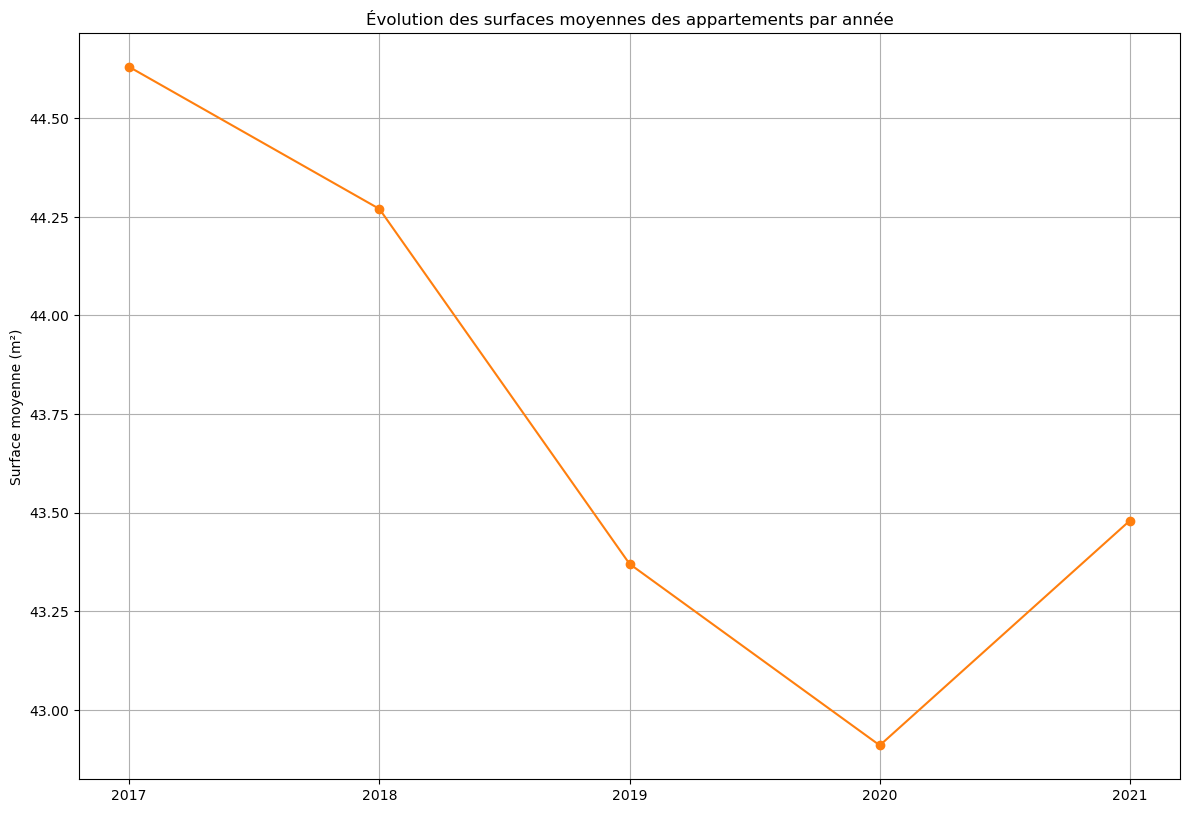

In [28]:
## Visualisation des différentes évolutions / version simplifiée / surfaces
# Création d'une figure et un axe principal
fig, ax1 = plt.subplots(figsize=(12, 8))

# Création d'un second axe qui partage le même axe x
# ax1 = ax1.twinx()  
ax1.set_ylabel('Surface moyenne (m²)', color='black')
ax1.plot(immos_appartements_m2['annee'], immos_appartements_m2['surface_moyenne'], marker='o', color='tab:orange', label='Surface moyenne')
ax1.tick_params(axis='y', labelcolor='black')

# Ajout des légendes
fig.tight_layout()  # Ajuster l'espacement pour éviter le chevauchement des étiquettes
plt.title('Évolution des surfaces moyennes des appartements par année')
ax1.grid(True)

plt.xticks(immos_appartements_m2.annee)

# Affichage du graphique
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1. 6 - Différences de prix au mètre carré entre les arrondissements</h3>
</div> 

In [30]:
# Liste des codes postaux par arrondissement de Paris
immos.code_postal.value_counts().sort_index()

code_postal
75001     467
75002     733
75003     876
75004     590
75005     909
75006     782
75007     667
75008     767
75009    1087
75010    1326
75011    2065
75012    1107
75013     925
75014    1329
75015    2451
75016    2102
75017    2361
75018    2922
75019    1129
75020    1585
Name: count, dtype: int64

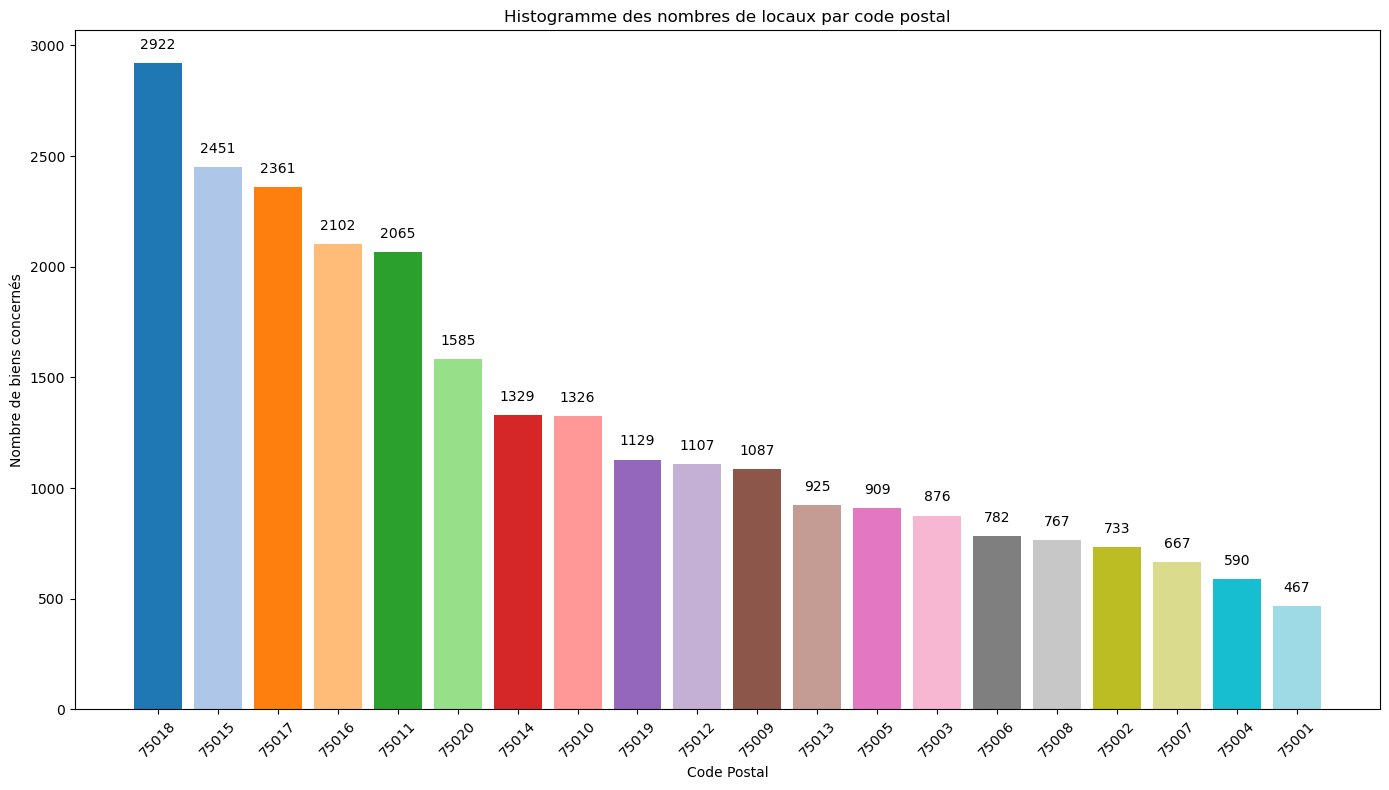

In [31]:
# Données
code_postal = [
    75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009, 75010,
    75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018, 75019, 75020
]
valeurs = [
    467, 733, 876, 590, 909, 782, 667, 767, 1087, 1326,
    2065, 1107, 925, 1329, 2451, 2102, 2361, 2922, 1129, 1585
]

# Création d'un dictionnaire pour correspondre les codes postaux et les valeurs
data = dict(zip(code_postal, valeurs))

# Tri des données par valeurs descendantes
sorted_data = sorted(data.items(), key=lambda item: item[1], reverse=True)
sorted_code_postal = [item[0] for item in sorted_data]
sorted_valeurs = [item[1] for item in sorted_data]

# Couleurs pour les barres
cmap = plt.get_cmap('tab20')
colors = [cmap(i / len(sorted_valeurs)) for i in range(len(sorted_valeurs))]

# Création de l'histogramme
plt.figure(figsize=(14, 8))
bars = plt.bar(range(len(sorted_code_postal)), sorted_valeurs, color=colors)

# Ajouter des labels et un titre
plt.xlabel('Code Postal')
plt.ylabel('Nombre de biens concernés')
plt.title('Histogramme des nombres de locaux par code postal')

# Ajuster les labels de l'axe x pour montrer tous les codes postaux de 75001 à 75020
plt.xticks(ticks=range(len(code_postal)), labels=sorted_code_postal, rotation=45)

# Afficher les valeurs sur les barres
for bar, value in zip(bars, sorted_valeurs):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 50, value, ha='center', va='bottom')

# Afficher l'histogramme
plt.tight_layout()
plt.show()

In [32]:
# Création d'un DataFrame pour une deuxième visualisation avec l'evolution des prix par arrondissement
immos_appartements_m2_arrondissement = immos[immos['type_local']=='Appartement'].groupby(['code_postal', 'annee']).agg(
    prix_moyen_vente=('valeur_fonciere', 'mean'),
    surface_moyenne=('surface_reelle', 'mean'),
    prix_m2=('prix_m2', 'mean')
).round(2).reset_index()

immos_appartements_m2_arrondissement

,code_postal,annee,prix_moyen_vente,surface_moyenne,prix_m2
0,75001,2017,530392.41,45.24,11762.71
1,75001,2018,581390.37,46.01,12621.23
2,75001,2019,454606.24,34.31,13269.26
3,75001,2020,601204.89,44.87,13405.99
4,75001,2021,639321.08,47.78,13379.50
...,...,...,...,...,...
95,75020,2017,313979.41,39.78,7886.02
96,75020,2018,316909.31,37.34,8485.16
97,75020,2019,322005.37,35.38,9093.99
98,75020,2020,316868.86,33.94,9329.31


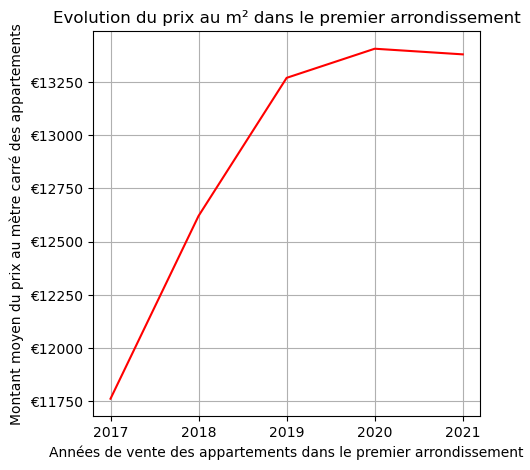

In [33]:
# Création d'un graphique pour visualiser la hausse de la moyenne des prix au mètre carré dans le premier arrondissement
import matplotlib.ticker as ticker
plt.figure(figsize=(5,5))
plt.plot(immos_appartements_m2_arrondissement[immos_appartements_m2_arrondissement.code_postal==75001].annee, immos_appartements_m2_arrondissement[immos_appartements_m2_arrondissement.code_postal==75001].prix_m2, color='red')
plt.xlabel('Années de vente des appartements dans le premier arrondissement')
plt.ylabel('Montant moyen du prix au mètre carré des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(immos_appartements_m2_arrondissement[immos_appartements_m2_arrondissement.code_postal==75001].annee)
plt.grid()
plt.title('Evolution du prix au m² dans le premier arrondissement')
plt.show()

**Evolution des prix de vente pour les 20 arrondissements de Paris**

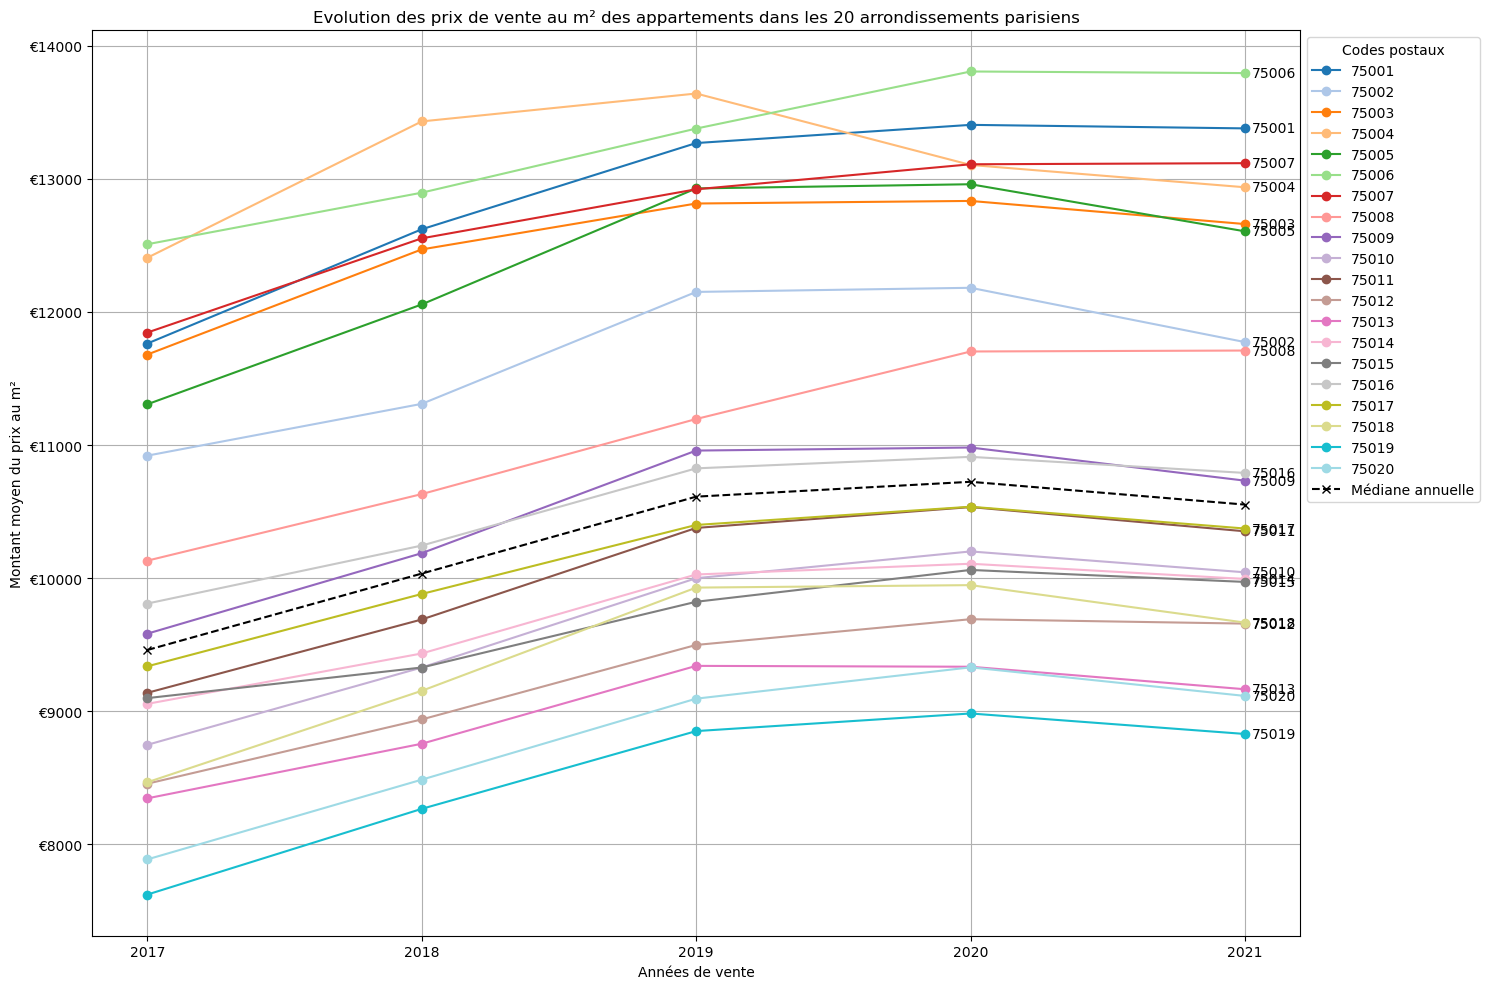

In [35]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris
plt.figure(figsize=(15,10))

# Utilisation de la palette de couleurs 'tab20'
import matplotlib.colors as mcolors
colors = plt.get_cmap('tab20').colors

# Obtention de la liste des codes postaux uniques
codes_postaux = immos_appartements_m2_arrondissement['code_postal'].unique()

# Traçage d'une ligne pour chaque code postal
for i, code_postal in enumerate(codes_postaux):
    subset = immos_appartements_m2_arrondissement[immos_appartements_m2_arrondissement['code_postal'] == code_postal]
    plt.plot(subset['annee'], subset['prix_m2'], marker='o', label=code_postal, color=colors[i % len(colors)])
    # Ajouter des étiquettes à la fin de chaque ligne
    plt.annotate(code_postal,
                 xy=(subset['annee'].values[-1], subset['prix_m2'].values[-1]),
                 xytext=(5, 0),
                 textcoords='offset points',
                 ha='left',
                 va='center')
    
# Calcul de la médiane annuelle des prix moyens de vente
median_trend = immos_appartements_m2_arrondissement.groupby('annee')['prix_m2'].median().reset_index()

# Traçage de la courbe médiane de tendance
plt.plot(median_trend['annee'], median_trend['prix_m2'], color='black', linestyle='--', marker='x', label='Médiane annuelle')

plt.xlabel('Années de vente')
plt.ylabel('Montant moyen du prix au m²')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(immos_appartements_m2_arrondissement[immos_appartements_m2_arrondissement.code_postal==75001].annee)
plt.grid()
plt.title('Evolution des prix de vente au m² des appartements dans les 20 arrondissements parisiens')
plt.legend(bbox_to_anchor=(1, 1),loc='upper left', title='Codes postaux')

plt.tight_layout()
plt.show()

Les évolutions sont très diverses, la tendance de la médiane est une hausse de 2017 à 2020, puis une inflexion en 2021.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.4 - Prix au mètre carré par transaction dans un arrondissement</h3>
</div>    

In [38]:
#V Vérification du nombre de transactions dans le 6ème car le prix semble élevé
immos[immos['code_postal'] == 75006].shape[0]

782

In [39]:
# Pourcentage des transactions du 6ème arrondissement dans les données
round(immos[immos['code_postal'] == 75006].shape[0]/immos.shape[0]*100,2)

2.99

On constate que le nombre de transactions est inférieur à la moyenne sur 20 arrondissement : 1/20 = 5%, d'où l'influence marquée et probable de quelques ventes à prix fort.

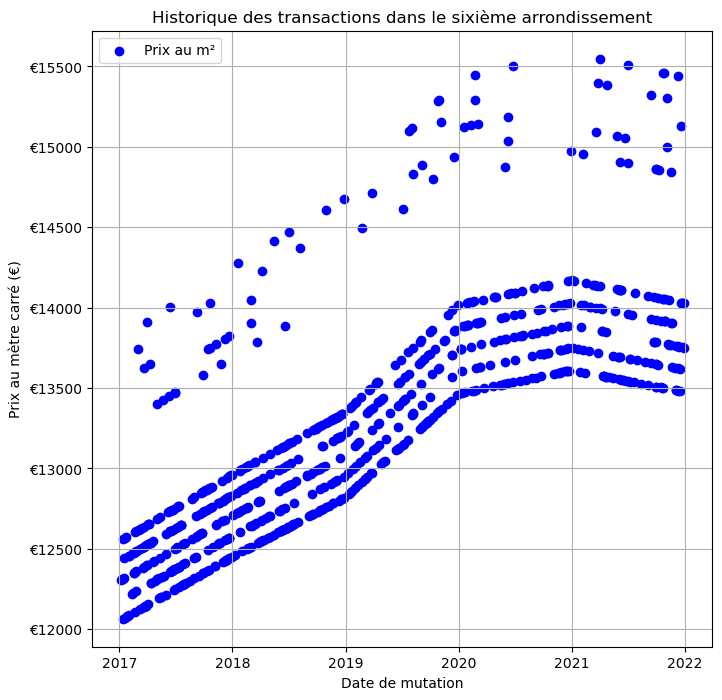

In [41]:
# Visualisation de l'historique des transactions et sa dispersion / scatterplot
plt.figure(figsize=(8,8))
plt.scatter(immos[immos['code_postal'] == 75006].date_mutation, immos[immos['code_postal'] == 75006].prix_m2, color='b', label='Prix au m²')

# Ajout des labels et une légende
plt.xlabel('Date de mutation')
plt.ylabel('Prix au mètre carré (€)')
plt.title('Historique des transactions dans le sixième arrondissement')
plt.grid(which='both')

# Formatage de l'axe des y pour afficher les prix en euros
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)

# Affichage du graphique
plt.legend()
plt.show()

On observe que les courbes, ascendantes de 2017 à 2020, s'infléchissent en 2021. Une certaine linéarité du graphique est visible. Corrélation ?

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.5 - Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson </h3>
</div>    

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [45]:
# Calcul du coefficient de corrélation de Pearson
from scipy.stats import pearsonr

# Conversion des dates en timestamps
immos['timestamp'] = immos['date_mutation'].apply(lambda x: x.timestamp())

# Calcul du coefficient de corrélation de Pearson
correlation, p_value = pearsonr(immos[immos['code_postal'] == 75006].timestamp, immos[immos['code_postal'] == 75006].prix_m2)
print(f"Coefficient de corrélation de Pearson: {correlation}")
print(f"Valeur p: {p_value}")

Coefficient de corrélation de Pearson: 0.7711785106388903
Valeur p: 3.929040685438038e-155


Nous pouvons confirmer la corrélation.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 1.6 - Vérification de la relation entre la valeur foncière et la surface réelle</h3>
</div>  

In [48]:
# Calcul du coefficient de corrélation de Pearson
correlation, p_value = pearsonr(immos.valeur_fonciere, immos.surface_reelle)
print(f"Coefficient de corrélation de Pearson: {correlation}")
print(f"Valeur p: {p_value}")

Coefficient de corrélation de Pearson: 0.9835590862067931
Valeur p: 0.0


Nous confirmons encore mieux la corrélation.

Regardons maintenant si le type de bien à une influence sur le prix au mètre carré également.

### 10. Analyse comparée des évolutions des prix moyen au m² selon le type de locaux

In [52]:
# Création d'un DataFrame groupé par type de locaux calculant la moyenne des prix au m² des ventes par année
immos_prix_m2_moyens = immos.groupby(['type_local','annee']).agg(prix_m2=('prix_m2', 'mean')).round(2).reset_index()

immos_prix_m2_moyens

,type_local,annee,prix_m2
0,Appartement,2017,9492.44
1,Appartement,2018,10031.40
2,Appartement,2019,10562.46
3,Appartement,2020,10675.34
4,Appartement,2021,10455.60
5,Local industriel. commercial ou assimilé,2017,10944.06
6,Local industriel. commercial ou assimilé,2018,11569.50
7,Local industriel. commercial ou assimilé,2019,11960.13
8,Local industriel. commercial ou assimilé,2020,11966.47
9,Local industriel. commercial ou assimilé,2021,12006.49


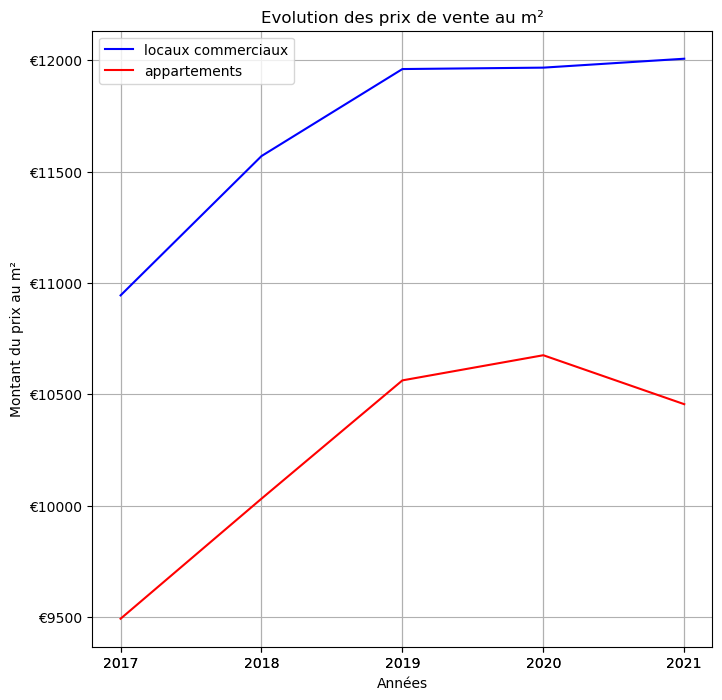

In [53]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(8,8))
plt.plot( immos_prix_m2_moyens[immos_prix_m2_moyens['type_local']=='Local industriel. commercial ou assimilé'].annee, immos_prix_m2_moyens[immos_prix_m2_moyens['type_local']=='Local industriel. commercial ou assimilé'].prix_m2, label='locaux commerciaux', color='blue')
plt.plot(immos_prix_m2_moyens[immos_prix_m2_moyens['type_local']=='Appartement'].annee, immos_prix_m2_moyens[immos_prix_m2_moyens['type_local']=='Appartement'].prix_m2, label='appartements', color='red')
plt.xlabel('Années')
plt.ylabel('Montant du prix au m²')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(immos_prix_m2_moyens.annee)
plt.grid()
plt.title('Evolution des prix de vente au m²')
plt.show()

Le prix au mètre carré des locaux commerciaux est très supérieur à celui des appartements.

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Régression linéaire</h2>
</div>

In [57]:
# Création d'une fonction d'évaluation des différents modèles de régression testés
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

def evaluate_model(y_test, y_pred, model, feature_columns):
    """
    Évalue les performances d'un modèle de régression.
    
    Paramètres :
    y_test (array-like): valeurs réelles
    y_pred (array-like): valeurs prédites
    model (sklearn model): modèle de régression entraîné
    feature_columns (list): liste des noms des colonnes de caractéristiques
    
    Retourne :
    dict: Un dictionnaire contenant RMSE, R², MAPE et les coefficients du modèle
    """
    
    # Calcul de la racine de l'erreur quadratique moyenne (RMSE) et du coefficient de détermination (R²)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
    r2 = round(r2_score(y_test, y_pred), 4)
    
    # Calcul de la Mean Absolute Percentage Error (MAPE)
    mape = round(mean_absolute_percentage_error(y_test, y_pred), 2)
    
    # Affichage des coefficients du modèle
    coefficients = pd.DataFrame(model.coef_, feature_columns, columns=['Coefficient'])
    
    # Impression des résultats
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Coefficient of Determination (R^2): {r2}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
    print(coefficients)
    
    # Retour des résultats sous forme de dictionnaire
    return {
        "RMSE": rmse,
        "R2": r2,
        "MAPE": mape,
        "Coefficients": coefficients
    }

In [58]:
immos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26180 entries, 0 to 26195
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_mutation    26180 non-null  datetime64[ns]
 1   valeur_fonciere  26180 non-null  float64       
 2   code_postal      26180 non-null  int64         
 3   type_local       26180 non-null  object        
 4   surface_reelle   26180 non-null  int64         
 5   prix_m2          26180 non-null  float64       
 6   annee            26180 non-null  int32         
 7   timestamp        26180 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2), object(1)
memory usage: 1.7+ MB


In [59]:
# Import des modules nécessaires à la régression linéaire
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Copie pour ml
df = immos

# Encodage des variables catégorielles
df = pd.get_dummies(df, columns=['code_postal', 'type_local'])

# Définition des variables explicatives (X) et la variable à prédire (y)
X = df.drop(columns=['valeur_fonciere', 'date_mutation', 'annee', 'prix_m2'])
y = df['valeur_fonciere']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Entraînement du modèle de régression linéaire
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model_LR.predict(X_test)

# Évaluation du modèle
results = evaluate_model(y_test, y_pred, model_LR, X.columns)

Root Mean Squared Error (RMSE): 65290.48
Coefficient of Determination (R^2): 0.9821
Mean Absolute Percentage Error (MAPE): 0.0900
                                                      Coefficient
surface_reelle                                       10444.927238
timestamp                                                0.000468
code_postal_75001                                   106731.289537
code_postal_75002                                    34441.048100
code_postal_75003                                    72059.445974
code_postal_75004                                   115642.612581
code_postal_75005                                    53298.362951
code_postal_75006                                   136619.925185
code_postal_75007                                   120510.280750
code_postal_75008                                    28119.918781
code_postal_75009                                   -17646.782166
code_postal_75010                                   -57709.842147
code_postal_

Notre algorithme fait donc 9% d'erreur en moyenne sur la prédiction de la valeur foncière.

L'erreur est inférieure au 10% attendu, mais le modèle pourrait être amélioré :
- standardisation des variables ?
- prise en compte des tendances non linéaires ?
- un mix des deux ?

In [61]:
# Standardisation des variables explicatives
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

# Entraînement du modèle de régression linéaire
model_LR_scaled = LinearRegression()
model_LR_scaled.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model_LR_scaled.predict(X_test)

# Évaluation du modèle
results = evaluate_model(y_test, y_pred, model_LR_scaled, X.columns)

Root Mean Squared Error (RMSE): 65290.45
Coefficient of Determination (R^2): 0.9821
Mean Absolute Percentage Error (MAPE): 0.0900
                                                     Coefficient
surface_reelle                                      5.474940e+05
timestamp                                           2.140034e+04
code_postal_75001                                  -1.354633e+14
code_postal_75002                                  -1.688329e+14
code_postal_75003                                  -1.840490e+14
code_postal_75004                                  -1.518966e+14
code_postal_75005                                  -1.873613e+14
code_postal_75006                                  -1.742168e+14
code_postal_75007                                  -1.612614e+14
code_postal_75008                                  -1.725888e+14
code_postal_75009                                  -2.041634e+14
code_postal_75010                                  -2.244175e+14
code_postal_75011        

*Modification décevante : les performances sont identiques*

In [63]:
# Ajout de caractéristiques polynomiales
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Obtention des noms des nouvelles colonnes après transformation polynomiale
feature_names = poly.get_feature_names_out(X.columns)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33, random_state=42)

# Entraînement du modèle de régression linéaire
model_LR_poly = LinearRegression()
model_LR_poly.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model_LR_poly.predict(X_test)

# Évaluation du modèle
results = evaluate_model(y_test, y_pred, model_LR_poly, feature_names)

Root Mean Squared Error (RMSE): 59041.25
Coefficient of Determination (R^2): 0.9854
Mean Absolute Percentage Error (MAPE): 0.1000
                                                    Coefficient
surface_reelle                                        -0.001651
timestamp                                              0.015866
code_postal_75001                                     -0.000051
code_postal_75002                                      0.000020
code_postal_75003                                      0.000020
...                                                         ...
code_postal_75020 type_local_Appartement               0.000571
code_postal_75020 type_local_Local industriel. ...    -0.000348
type_local_Appartement^2                               0.001130
type_local_Appartement type_local_Local industr...     0.000000
type_local_Local industriel. commercial ou assi...    -0.001130

[324 rows x 1 columns]


*Le R2 est meilleur, la RMSE également, mais la MAPE est moins bonne*

In [65]:
# Mix des deux / standardisation et ajout de caractéristiques polynomiales

# Ajout de caractéristiques polynomiales
X_poly = poly.fit_transform(X_scaled)

# Obtention des noms des nouvelles colonnes après transformation polynomiale
feature_names = poly.get_feature_names_out(X.columns)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Entraînement du modèle de régression linéaire
model_LR_mix = LinearRegression()
model_LR_mix.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model_LR_mix.predict(X_test)

# Évaluation du modèle
results = evaluate_model(y_test, y_pred, model_LR_mix, feature_names)

Root Mean Squared Error (RMSE): 18897.16
Coefficient of Determination (R^2): 0.9985
Mean Absolute Percentage Error (MAPE): 0.0200
                                                     Coefficient
surface_reelle                                      5.396891e+05
timestamp                                           2.129297e+04
code_postal_75001                                  -1.650418e+14
code_postal_75002                                   3.799224e+13
code_postal_75003                                   4.367225e+14
...                                                          ...
code_postal_75020 type_local_Appartement            1.897649e+13
code_postal_75020 type_local_Local industriel. ... -1.978532e+13
type_local_Appartement^2                            3.155901e+13
type_local_Appartement type_local_Local industr... -3.763741e+13
type_local_Local industriel. commercial ou assi...  4.141128e+11

[324 rows x 1 columns]


*Ce modèle plus perfectionné donne de meilleurs résultats : il minimise la RMSE et la MAPE et maximise le R2. C'est celui que nous retiendrons*

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Prédiction définitive pour le client</h2>
</div> 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [69]:
# Import des données à évaluer selon notre modèle
portefeuille = pd.read_excel("portefeuille_actifs.xlsx")

In [70]:
portefeuille.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   adresse_numero             275 non-null    int64  
 1   adresse_nom_voie           275 non-null    object 
 2   code_postal                275 non-null    int64  
 3   code_commune               275 non-null    int64  
 4   nom_commune                275 non-null    object 
 5   surface_carrez             275 non-null    float64
 6   code_type_local            275 non-null    int64  
 7   type_local                 275 non-null    object 
 8   surface_reelle_bati        275 non-null    int64  
 9   nombre_pieces_principales  275 non-null    int64  
 10  longitude                  275 non-null    float64
 11  latitude                   275 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 25.9+ KB


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [72]:
# Changement de la colonne 'surface_reelle_bati' en 'surface_reelle'
portefeuille = portefeuille.rename(columns={'surface_reelle_bati': 'surface_reelle'})

# Suppression des variables inutiles
wallet = portefeuille[['code_postal', 'type_local', 'surface_reelle']]

# Import de la  librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt
wallet['prediction_date'] = dt.datetime(2022, 12, 31)

# Conversion des dates en timestamps
wallet['timestamp'] = wallet['prediction_date'].apply(lambda x: x.timestamp())

# Encodage des variables catégorielles
wallet = pd.get_dummies(wallet, columns=['code_postal', 'type_local'])

# Suppression de la variable inutile
wallet = wallet.drop(columns=['prediction_date'])

In [73]:
wallet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   surface_reelle                                       275 non-null    int64  
 1   timestamp                                            275 non-null    float64
 2   code_postal_75001                                    275 non-null    bool   
 3   code_postal_75002                                    275 non-null    bool   
 4   code_postal_75003                                    275 non-null    bool   
 5   code_postal_75004                                    275 non-null    bool   
 6   code_postal_75005                                    275 non-null    bool   
 7   code_postal_75006                                    275 non-null    bool   
 8   code_postal_75007                                    275 non-null    b

In [74]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26180 entries, 0 to 26195
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   surface_reelle                                       26180 non-null  int64  
 1   timestamp                                            26180 non-null  float64
 2   code_postal_75001                                    26180 non-null  bool   
 3   code_postal_75002                                    26180 non-null  bool   
 4   code_postal_75003                                    26180 non-null  bool   
 5   code_postal_75004                                    26180 non-null  bool   
 6   code_postal_75005                                    26180 non-null  bool   
 7   code_postal_75006                                    26180 non-null  bool   
 8   code_postal_75007                                    26180 non-null  bo

Le DataFrame wallet a été préparé conformément à la structure de X, il peut être utilisé avec notre algorithme de prédiction.

In [76]:
# Prédiction sur notre portefeuille / modèle simple de régression linéaire
# valeurs_foncieres_pred = model_LR.predict(wallet)

# Les 10 premières valeurs
# print(valeurs_foncieres_pred[:10])

In [77]:
# Prédiction sur notre portefeuille / modèle amélioré de régression linéaire
wallet_scaled = scaler.transform(wallet)
wallet_poly = poly.transform(wallet_scaled)

valeurs_foncieres_pred = model_LR_mix.predict(wallet_poly)

# Les 10 premières valeurs
print(valeurs_foncieres_pred[:10])

[307323.625  233110.375  811708.375  864491.625  231631.     389915.5
 260033.125  587940.3125  58956.75    77457.1875]


**Comparaison de la valorisation prédite pour les deux segments.**

In [79]:
# Valorisation du portefeuille sur le segment des particuliers et corporate
wallet_vf = wallet
wallet_vf['valeur_fonciere']=np.round(valeurs_foncieres_pred, 0)

# Valorisation du portefeuille segment particulier
valeur_particulier = wallet_vf[wallet_vf['type_local_Appartement'] == True]['valeur_fonciere'].sum()
print(f"Valorisation du portefeuille segment particulier : {valeur_particulier:,.0f} €")

# Valorisation du portefeuille segment corporate
valeur_corporate = wallet_vf[wallet_vf['type_local_Local industriel. commercial ou assimilé'] == True]['valeur_fonciere'].sum()
print(f"Valorisation du portefeuille segment corporate : {valeur_corporate:,.0f} €")

# Rapport portefeuille corporate/particulier en %
rapport = (valeur_corporate - valeur_particulier) / valeur_corporate * 100
print(f"Rapport portefeuille corporate/particulier : {rapport:.2f} %")

Valorisation du portefeuille segment particulier : 60,815,444 €
Valorisation du portefeuille segment corporate : 91,157,157 €
Rapport portefeuille corporate/particulier : 33.29 %


**Conclusions et limites de cette estimation** :
- Le segment corporate, quoique sous_représenté dans les transactions historiques, a une plus grande valorisation dans le portefeuille
- La valorisation porte sur une plus-value latente et pourrait se voir bouleversée par l'orientation à venir du marché
- Un modèle, même le meilleur soit-il, ne reste qu’une approche probabiliste et ne saurait avoir valeur contractuelle

In [81]:
wallet_vf.head()

,surface_reelle,timestamp,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,...,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,valeur_fonciere
0,25,1.672445e+09,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,307324.0
1,22,1.672445e+09,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,233110.0
2,65,1.672445e+09,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,811708.0
3,74,1.672445e+09,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,864492.0
4,22,1.672445e+09,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,231631.0


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Classification non supervisée des données issues du jeu de test</h2>
</div> 

Algorithme du KMeans - Classification non supervisée en fonction du prix au m² des types de locaux  :
- Appartements
- Local industriel. commercial ou assimilé

In [84]:
# Import des données 
immos_kmn = pd.read_excel("echantillon_a_classer.xlsx")
immos_kmn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   valeur_fonciere  40 non-null     float64
 1   code_postal      40 non-null     int64  
 2   nom_commune      40 non-null     object 
 3   surface_reelle   40 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [85]:
# Préparation du DataFrame avant traitement
immos_kmn['prix_m2'] = immos_kmn['valeur_fonciere'] / immos_kmn['surface_reelle']
immos_kmn.drop(columns=['valeur_fonciere', 'nom_commune', 'surface_reelle'], inplace=True)
immos_kmn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   code_postal  40 non-null     int64  
 1   prix_m2      40 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 768.0 bytes


In [86]:
immos_kmn.code_postal.value_counts()

code_postal
75019    40
Name: count, dtype: int64

Ce ne sont que des locaux ou appartements du 19e arrondissement. Les données ne concernent que 2021.

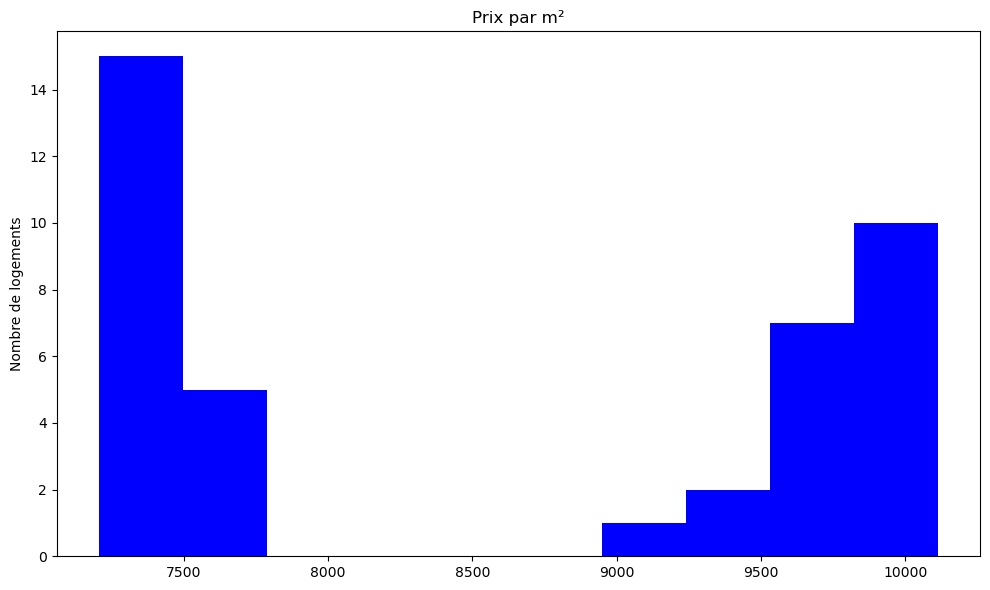

In [88]:
# Création d'un histogramme pour en visualiser la répartition
plt.figure(figsize=(10, 6))
plt.hist(immos_kmn['prix_m2'], color='blue')
plt.ylabel('Nombre de logements')
plt.title('Prix par m²')
plt.tight_layout()  # Pour ajuster le layout et éviter que les étiquettes se chevauchent
plt.show()

Des différences de prix de vente déjà observées : les locaux professionnels ont un prix de vente au m² supérieur à celui des appartements. 
Le prix au m² est donc une variable discriminante. <br>
**Utilisation de l'algorithme du Kmeans pour rechercher les 2 centroïdes relatifs aux types de locaux à travers les données.**

Centres des clusters : [[7408.77502952]
 [9806.92467429]]


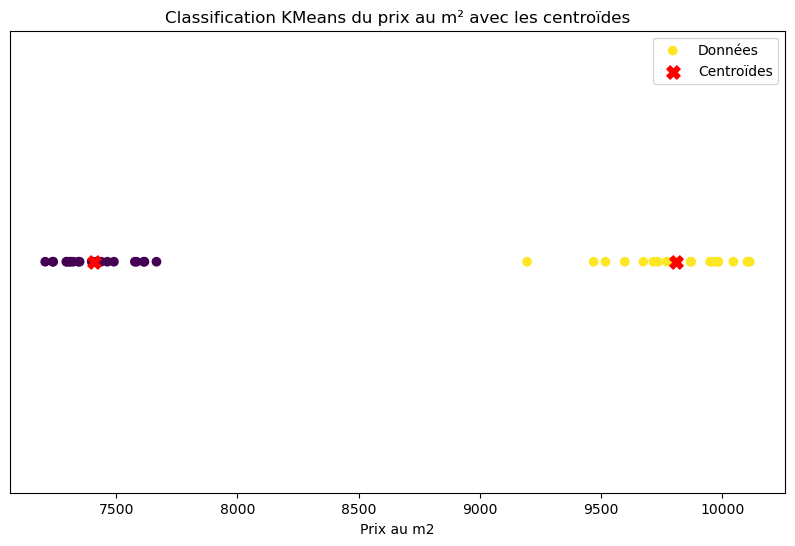

In [90]:
from sklearn.cluster import KMeans

# Préparation des données
X = immos_kmn[['prix_m2']]

# Application de KMeans avec 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
immos_kmn['cluster'] = kmeans.fit_predict(X)

# Affichage des centres des clusters
centroids = kmeans.cluster_centers_
print("Centres des clusters :", centroids)

# Visualisation des résultats avec les centroïdes
plt.figure(figsize=(10, 6))
plt.scatter(immos_kmn['prix_m2'], [0] * len(immos_kmn), c=immos_kmn['cluster'], cmap='viridis', marker='o', label='Données')
plt.scatter(centroids, [0, 0], c='red', marker='X', s=90, label='Centroïdes')
plt.xlabel('Prix au m2')
plt.title('Classification KMeans du prix au m² avec les centroïdes')
plt.yticks([])  # Enlève les ticks de l'axe y pour plus de clarté
plt.legend()
plt.show()

In [91]:
# Vérification des données de la prédiction sur les données connues filtrées
verif_immos_kmn_filt = immos[(immos['annee'] == 2021) & (immos['code_postal'] == 75019)][['type_local', 'prix_m2']]
verif_immos_kmn_filt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 21209 to 26144
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type_local  241 non-null    object 
 1   prix_m2     241 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.6+ KB


In [92]:
verif_immos_kmn_filt['cluster'] = kmeans.fit_predict(verif_immos_kmn_filt[['prix_m2']])

In [93]:
verif_immos_kmn_filt.head()

,type_local,prix_m2,cluster
21209,Appartement,8669.30,0
21218,Appartement,8936.05,0
21222,Appartement,9026.74,0
21256,Appartement,9026.52,0
21261,Appartement,8757.35,0


In [94]:
# Création d'un tableau croisé dynamique pour observer la distribution des clusters par type local
pivot_table_filt = pd.pivot_table(verif_immos_kmn_filt, values='prix_m2', index='type_local', columns='cluster', aggfunc='count', fill_value=0)

print(pivot_table_filt)

cluster                                     0   1
type_local                                       
Appartement                               230   0
Local industriel. commercial ou assimilé    0  11


*La classification non supervisée réalise un sans-faute sur nos données historiques filtrées.*

**Pour comparaison, appliquons notre classification non supervisée à notre portefeuille**

In [97]:
# Vérification des données de la prédiction sur le portefeuille
portefeuille_kmn = portefeuille
portefeuille_kmn['valeur_fonciere']=np.round(valeurs_foncieres_pred, 0)
portefeuille_kmn['prix_m2'] = portefeuille_kmn['valeur_fonciere'] / portefeuille_kmn['surface_reelle']
portefeuille_kmn = portefeuille_kmn[['type_local', 'prix_m2']]

portefeuille_kmn['cluster'] = kmeans.fit_predict(portefeuille_kmn[['prix_m2']])

# Création d'un tableau croisé dynamique pour observer la distribution des clusters par type local
pivot_table = pd.pivot_table(portefeuille_kmn, values='prix_m2', index='type_local', columns='cluster', aggfunc='count', fill_value=0)

print(pivot_table)

cluster                                     0   1
type_local                                       
Appartement                               119  35
Local industriel. commercial ou assimilé   40  81


*Erreur de 22% sur les appartements et de 33% sur les locaux commerciaux, la classification n'est plus adaptée*

**Pour comparaison, appliquons notre classification non supervisée à l'ensemble des données de l'historique**

In [100]:
# Vérification des données de la prédiction sur les données connues totales (tous arrondissements et toutes années)
verif_immos_kmn = immos[['type_local', 'prix_m2']]
verif_immos_kmn['cluster'] = kmeans.fit_predict(verif_immos_kmn[['prix_m2']])

# Création d'un tableau croisé dynamique pour observer la distribution des clusters par type local
pivot_table = pd.pivot_table(verif_immos_kmn, values='prix_m2', index='type_local', columns='cluster', aggfunc='count', fill_value=0)

print(pivot_table)

cluster                                      0      1
type_local                                           
Appartement                               4826  19512
Local industriel. commercial ou assimilé  1079    763


*Erreur de 20% sur les appartements et de 41% sur les locaux commerciaux (proche du hasard), la classification est encore moins adaptée.*

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse et présentation des résultats</h2>
</div> 

**Nos conclusions sur l'analyse et les limites de l'exercice** :
- Le prix de vente au m² est dépendant de : <br>
-> la surface du bien immobilier, <br>
-> la date considérée, <br>
-> la localisation (code_postal), <br>
-> du type de bien. <br>
- Une régression linéaire permet d'évaluer le prix de vente possible d'un bien à une date donnée en fonction de ces variables
- Le portefeuille des biens "Local industriel. commercial ou assimilé" est valorisé plus fortement à une date donnée que le portefeuille des biens "Appartement"

Limites ?
- L'avenir du marché n'est pas totalement dépendant du passé et personne n'est à l'abri d'un retournement de tendances : futures offres et demandes des différentes catégories de biens ?
- Les variables indépendantes de la régression linéaire expliquent effectivement le prix, mais d'autres éléments constitutifs du bien, non inventoriés ici, peuvent modifier sensiblement sa valeur future : environnement, contraintes de vente...